<a href="https://colab.research.google.com/github/Janani-selvakumaravelan/Customer-Segmentation-with-K-Means-Clustering/blob/main/Customer_Segmentation_with_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


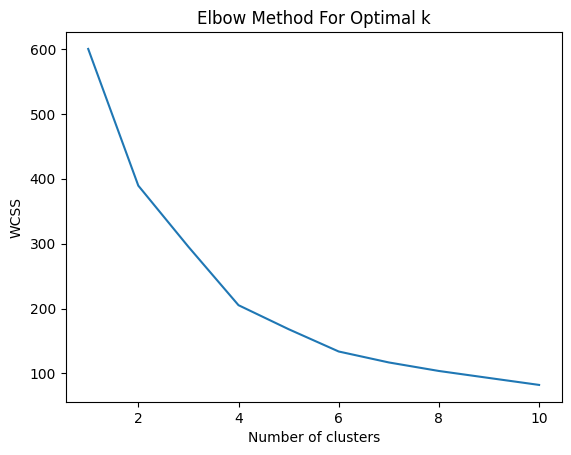

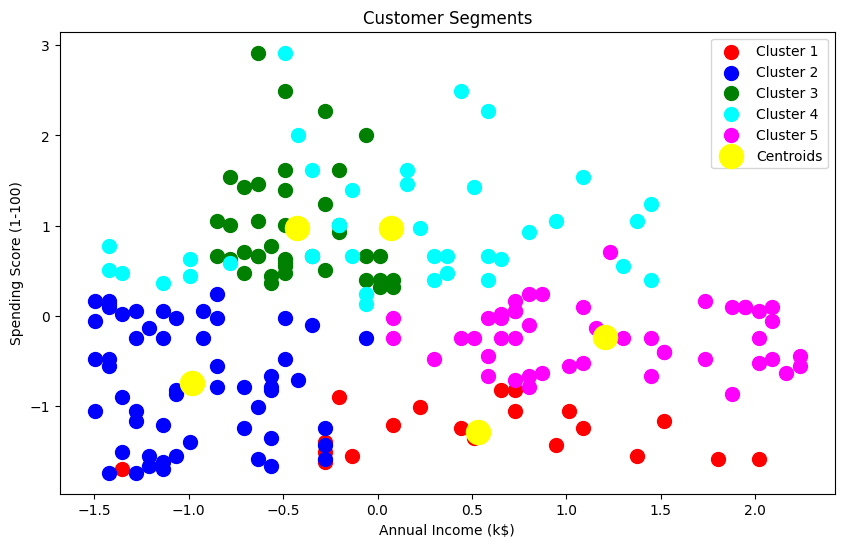

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


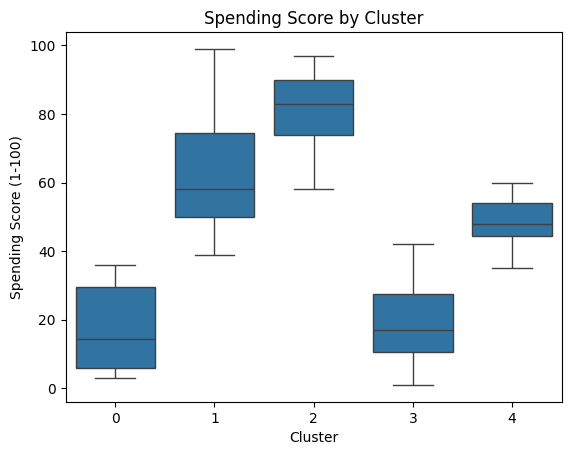

In [3]:
# Install kagglehub if not installed
!pip install kagglehub

# Import necessary libraries
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Download the dataset using KaggleHub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

# Load dataset into pandas dataframe
dataset = pd.read_csv(path + '/Mall_Customers.csv')  # Ensure correct path

# Display the first few rows of the dataset
dataset.head()

# Data preprocessing
# Drop unnecessary columns for clustering
dataset = dataset.drop(['CustomerID', 'Gender'], axis=1)   # Dropping CustomerID and Genre

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(dataset)

# Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the graph, choose the optimal k (let's assume k = 5 is optimal)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
dataset['Cluster'] = y_kmeans

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Cluster Profiling (Explaining the characteristics of each segment)
cluster_summary = dataset.groupby('Cluster').mean()
print(cluster_summary)

# Additional Analysis (e.g., analyzing spending habits of each group)
# Example: Plotting spending scores by cluster
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=dataset)
plt.title('Spending Score by Cluster')
plt.show()
